In [1]:
import evaluation 
import importlib
importlib.reload(evaluation)

<module 'evaluation' from '/Users/thomas/Documents/Master-Thesis/new_version/evaluation.py'>

In [2]:
from shallow_models.shallow_ensembles import RegressionEnsemble as ShallowEnsemble
import shallow_models
importlib.reload(shallow_models)

<module 'shallow_models' from '/Users/thomas/Documents/Master-Thesis/new_version/shallow_models/__init__.py'>

In [3]:
import ensembles
import networks
importlib.reload(networks)
import dataset_creation
import tensorflow as tf
import base
import numpy as np
#from shallow_models.shallow_ensembles import BootstrapEnsemble as ShallowBootstrap

In [4]:
trials = 3

num_neurons = [[10,10,10],[5,10,5],[10,5,10],[50,30,20],[1,1,1],[50,20,30],[50,50,50]]
seeds = [50,100,150,200,25]
num_layers = len(num_neurons[0])
learning_rates = np.arange(0.01,0.1,0.005)#np.arange(0.1,0.01,0.001)#
#AdamWOptimizer = tf.contrib.opt.extend_with_decoupled_weight_decay(tf.train.AdamOptimizer)


#tf.contrib.opt.AdamWOptimizer]
#tf.contrib.opt.NadamOptimizer
#learning_rates   = (learning_rates-min(learning_rates))/(max(learning_rates)-min(learning_rates))

activations = [[tf.nn.tanh]*num_layers,[tf.nn.leaky_relu]*num_layers, [tf.sigmoid]*num_layers,[tf.nn.relu]*num_layers]
initialisation_schemes = [tf.keras.initializers.he_normal, tf.contrib.layers.xavier_initializer] 
optimizers = [tf.contrib.opt.NadamOptimizer, tf.train.AdamOptimizer]#, tf.train.MomentumOptimizer]#,AdamWOptimizer]#, tf.contrib.opt.AdamWOptimizer]



param_grid = {'num_neurons': num_neurons,
              'activations':activations,
             'initialisation_scheme':initialisation_schemes,
             #'learning_rate':learning_rates,
              'optimizer':optimizers,
             'seed':seeds,
             'l2':[True,False]
             }


model_num_neurons = [30,50,30,10]
model_params = {
    'seed':50,
    'learning_rate':0.002,
    'num_neurons':model_num_neurons,
    'activations':[tf.nn.leaky_relu]*len(model_num_neurons),
    'optimizer': tf.contrib.opt.NadamOptimizer,
    'initialisation_scheme':tf.keras.initializers.he_normal, #tf.contrib.layers.xavier_initializer#
    #'l':0.05,
    
}
#thompson_model = networks.DropoutNetwork
#thompson_model = ensembles.BootstrapThroughTimeBobStrap
thompson_model=ensembles.BootstrapEnsemble
#thompson_model = ensembles.ForcedDiversityBootstrapThroughTime3

ds = dataset_creation.NonlinearDataset
decay_factor = 1.5

In [5]:
learning_rates

array([0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045, 0.05 ,
       0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085, 0.09 , 0.095])

In [6]:
tg = evaluation.ThompsonGridSearch(param_grid=param_grid, 
                                   dataset_creator=ds, 
                                   thompson_model=thompson_model,
                                   test_model=networks.DropoutNetwork,
                                  model_params=model_params,
                                  decay_factor=decay_factor)

initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Ensemble <class 'ensembles.BootstrapEnsemble'>


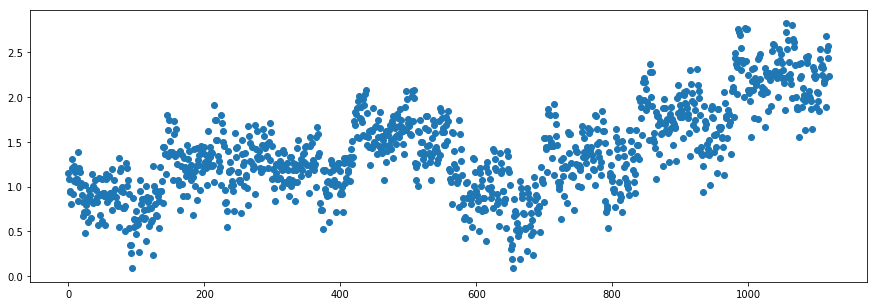

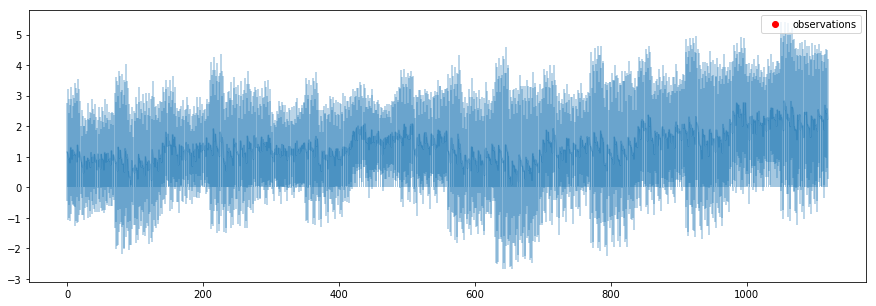

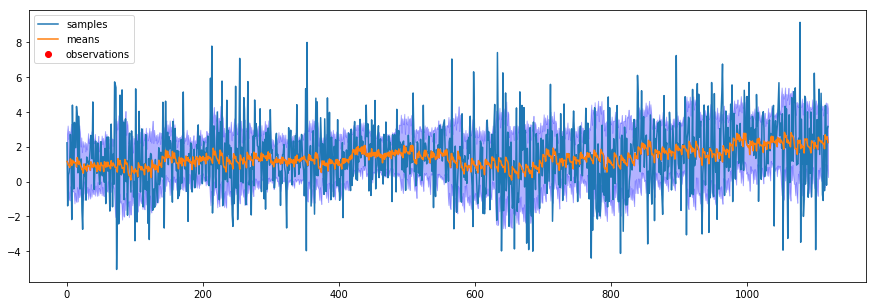

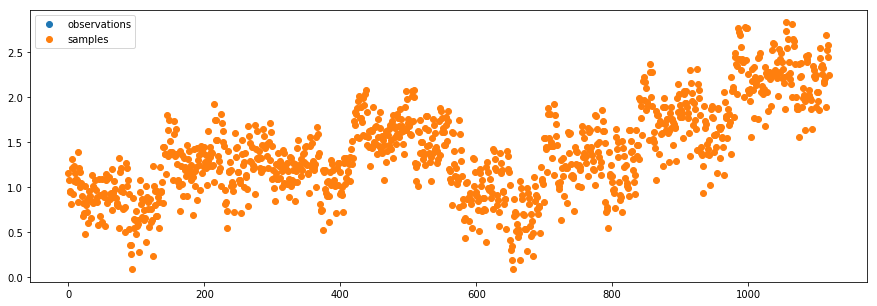

In [7]:
tg.plot_sample_grid()

initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 2)
new X is in there: True
new y is in there: True
mean probability is 1.0


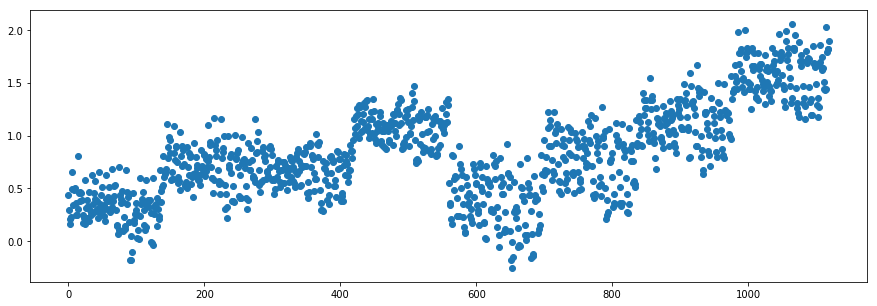

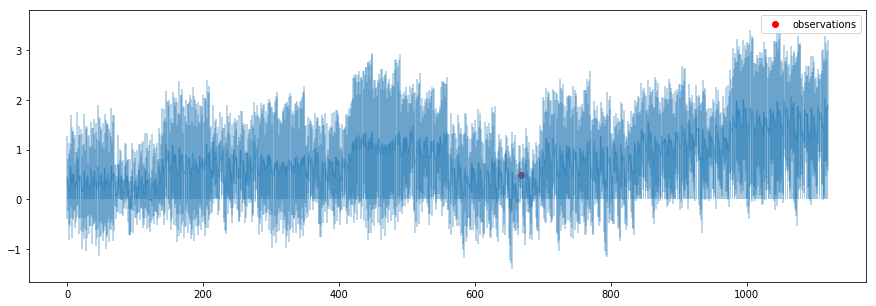

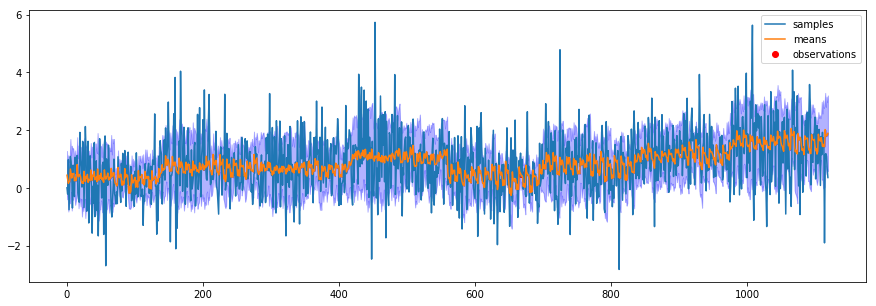

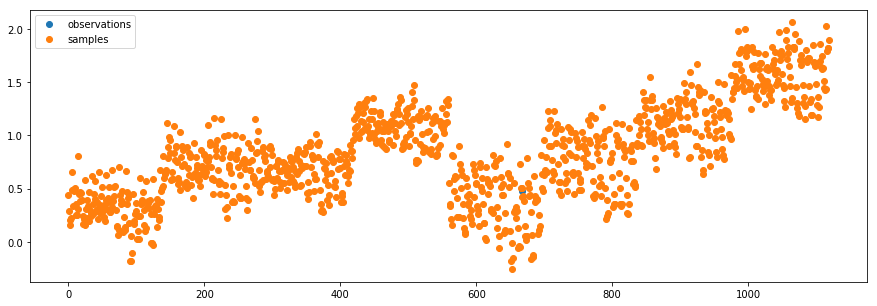

In [8]:
tg.goforit(1)
tg.plot_sample_grid()

initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 2)
new X is in there: True
new y is in there: True
mean probability is 0.6666666666666666
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 2)
new X is in there: True
new y is in there: True
mean probability is 0.5
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 2)
new X is in there: True
new y is in there: True
mean probability is 0.4
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 3)
new X is in there: True
new y is in there: True
mean probability is 0.5
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 6)
new X is in there: True
new y is in there: True
mean probability is 0.8571428571428571
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 5)
new X is in there: True
new y is in there: True
mean probability is 0.

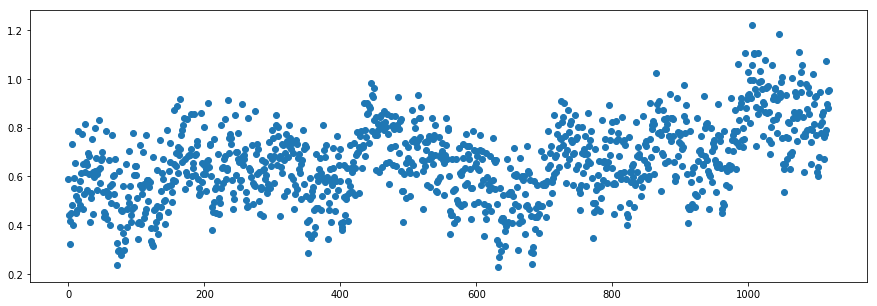

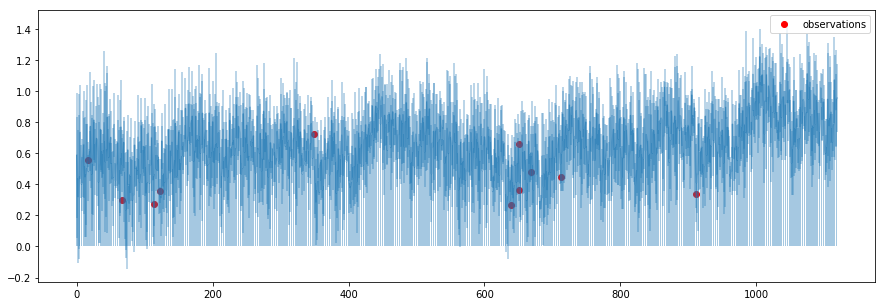

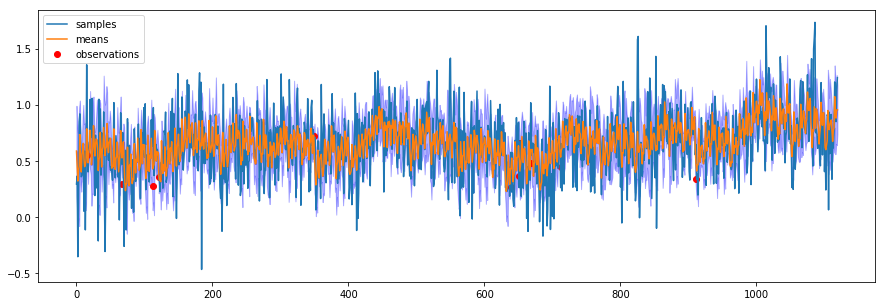

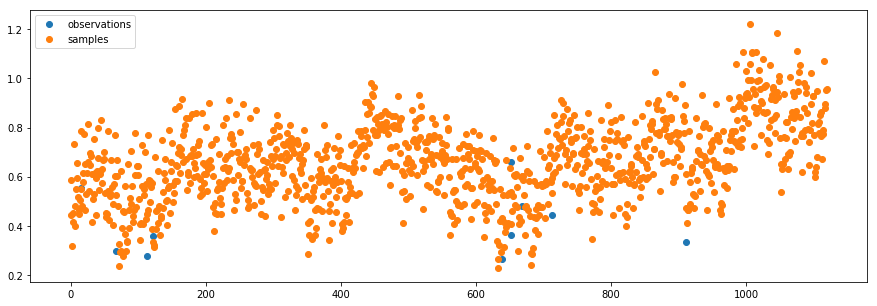

In [9]:
tg.goforit(10)
tg.plot_sample_grid()

In [10]:
tg.get_best_observation()

({'params': {'activations': [<function tensorflow.python.ops.gen_nn_ops.relu(features, name=None)>,
    <function tensorflow.python.ops.gen_nn_ops.relu(features, name=None)>,
    <function tensorflow.python.ops.gen_nn_ops.relu(features, name=None)>],
   'initialisation_scheme': <function tensorflow.contrib.layers.python.layers.initializers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32)>,
   'l2': False,
   'num_neurons': [10, 5, 10],
   'optimizer': tensorflow.python.training.adam.AdamOptimizer,
   'seed': 25},
  'score': 0.2653879738634029,
  'X': array([[0],
         [0],
         [1],
         [0],
         [1],
         [0],
         [1],
         [0],
         [0],
         [1],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1],
         [0],
         [0],
         [0],
         [1],
         [0]], dtype=uint8)},
 {'params': {'activations': [<function tensorflow.python.ops.nn_ops.leaky_relu(features, alpha=0.2, name=Non

initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 7)
new X is in there: True
new y is in there: True
mean probability is 0.5384615384615384
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 7)
new X is in there: True
new y is in there: True
mean probability is 0.5
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 6)
new X is in there: True
new y is in there: True
mean probability is 0.4
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 10)
new X is in there: True
new y is in there: True
mean probability is 0.625
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 9)
new X is in there: True
new y is in there: True
mean probability is 0.5294117647058824
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 10)
new X is in there: True
new y is in there: True
mean probability i

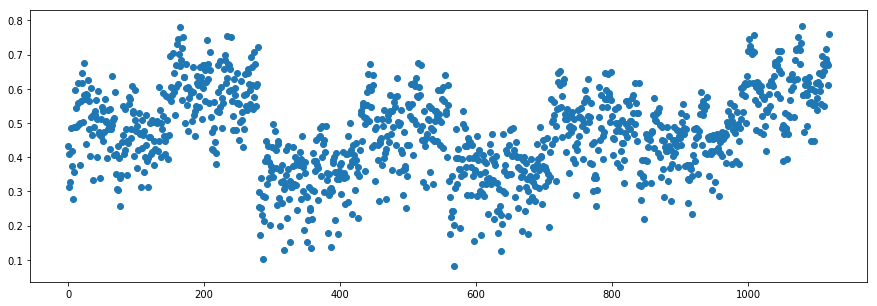

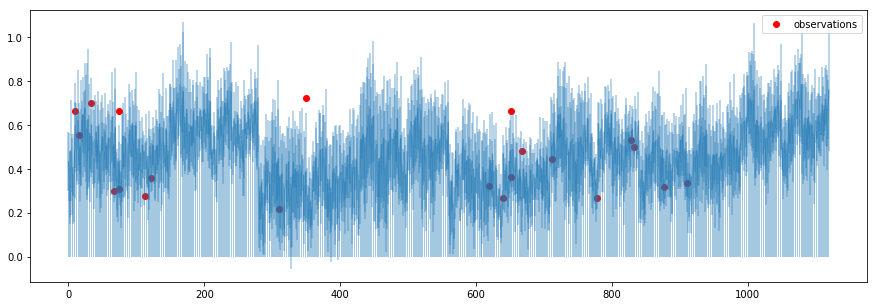

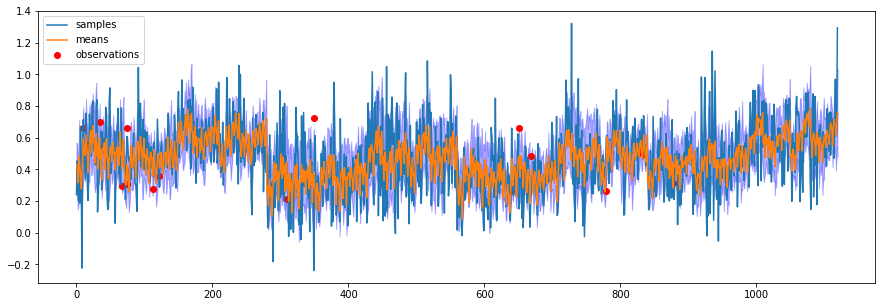

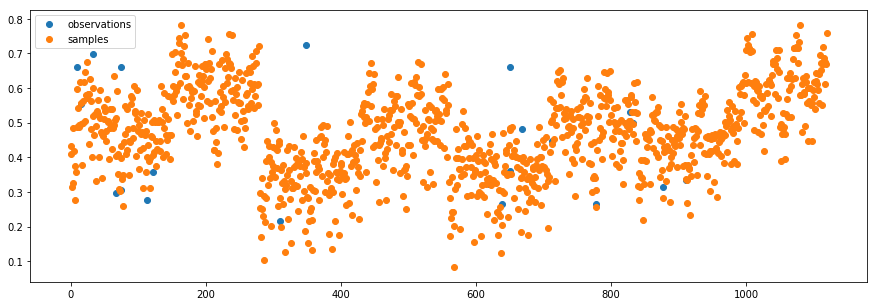

In [11]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 9)
new X is in there: True
new y is in there: True
mean probability is 0.391304347826087
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 11)
new X is in there: True
new y is in there: True
mean probability is 0.4583333333333333
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 13)
new X is in there: True
new y is in there: True
mean probability is 0.52
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 10)
new X is in there: True
new y is in there: True
mean probability is 0.38461538461538464
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 17)
new X is in there: True
new y is in there: True
mean probability is 0.6296296296296297
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 13)
new X is in there: True
new y is i

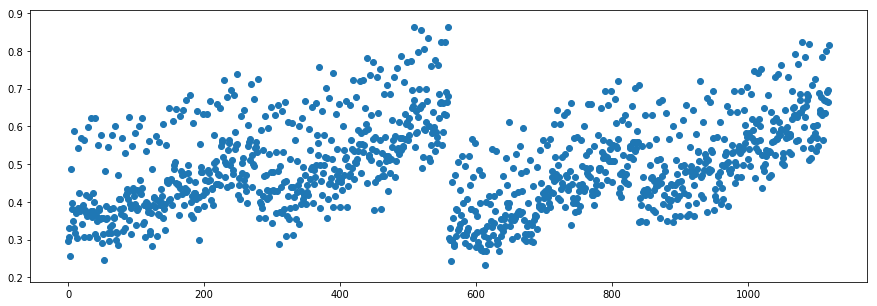

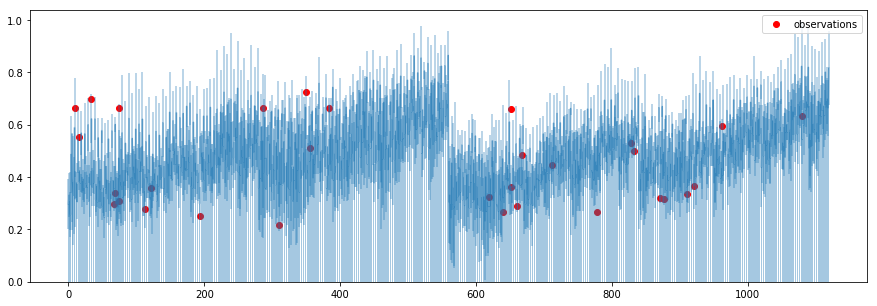

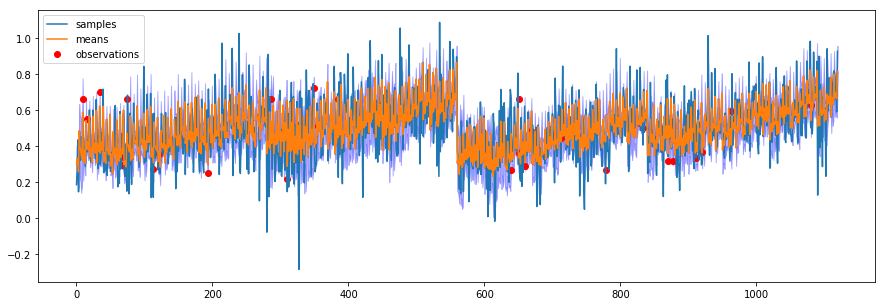

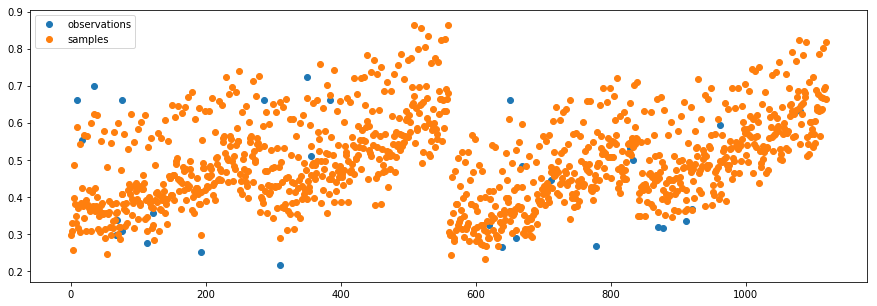

In [12]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 17)
new X is in there: True
new y is in there: True
mean probability is 0.5151515151515151
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 18)
new X is in there: True
new y is in there: True
mean probability is 0.5294117647058824
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 18)
new X is in there: True
new y is in there: True
mean probability is 0.5142857142857142
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 16)
new X is in there: True
new y is in there: True
mean probability is 0.4444444444444444
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 17)
new X is in there: True
new y is in there: True
mean probability is 0.4594594594594595
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 13)
new X is in there: 

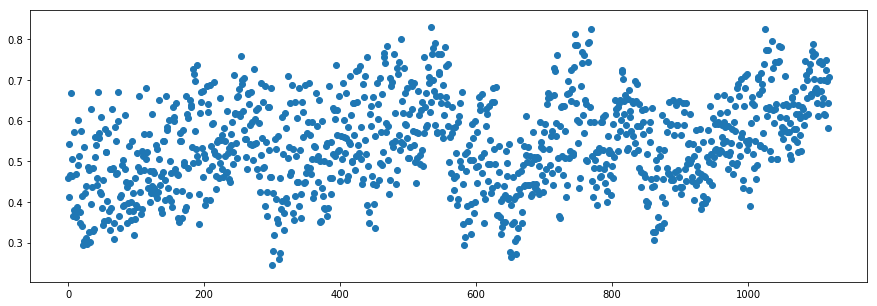

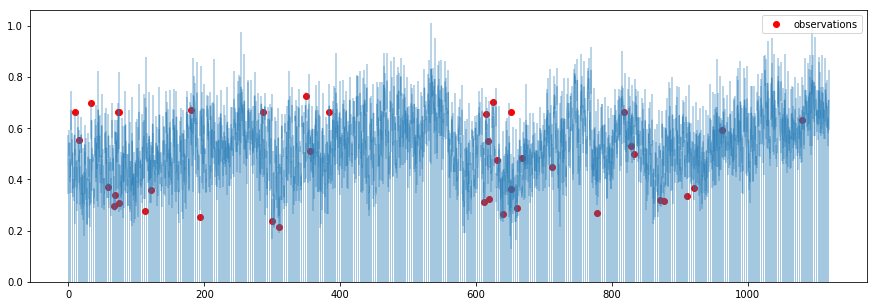

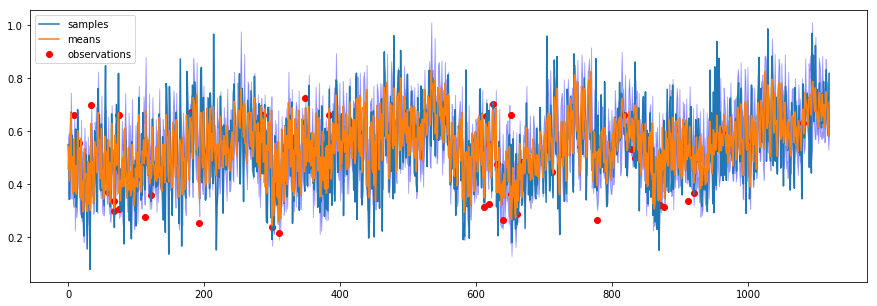

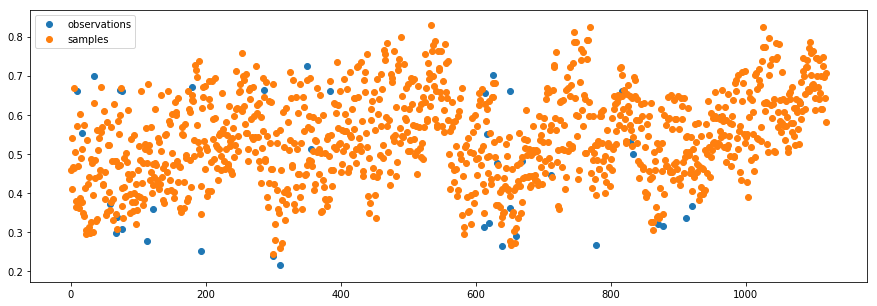

In [13]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 15)
new X is in there: True
new y is in there: True
mean probability is 0.3488372093023256
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 15)
new X is in there: True
new y is in there: True
mean probability is 0.3409090909090909
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 25)
new X is in there: True
new y is in there: True
mean probability is 0.5555555555555556
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 18)
new X is in there: True
new y is in there: True
mean probability is 0.391304347826087
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 20)
new X is in there: True
new y is in there: True
mean probability is 0.425531914893617
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 22)
new X is in there: Tr

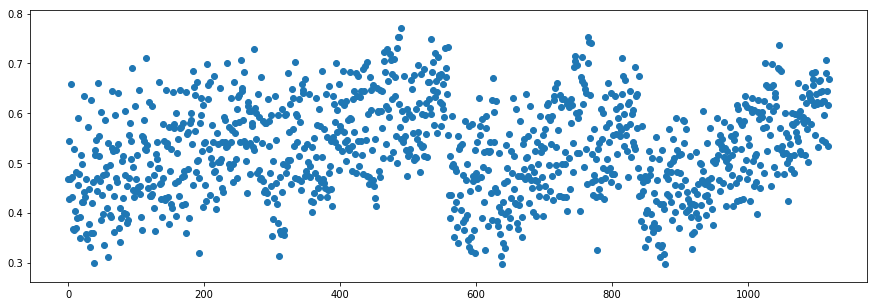

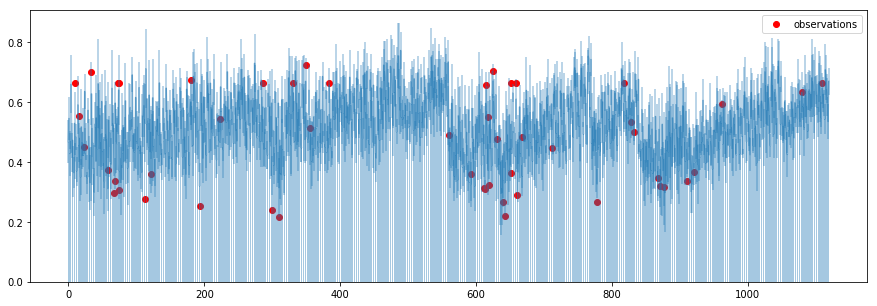

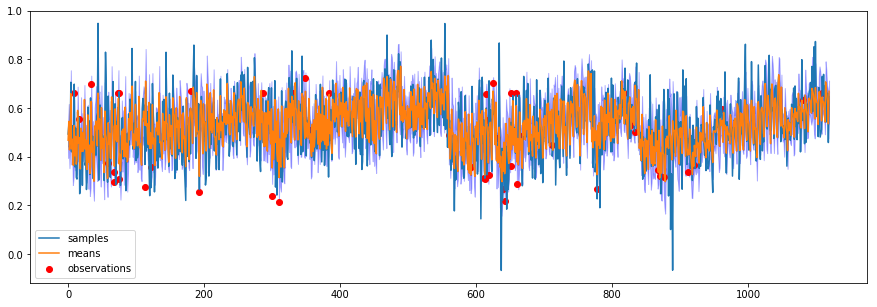

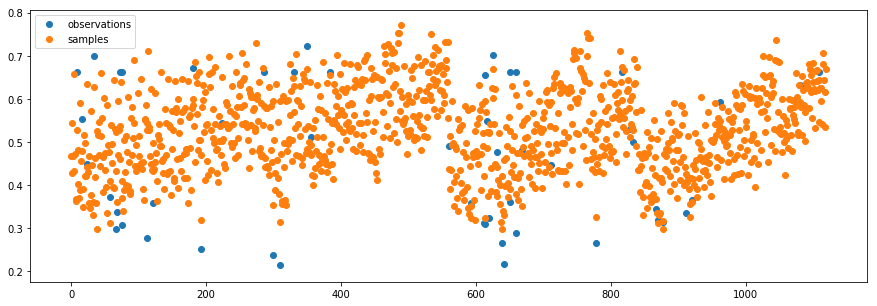

In [14]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 21)
new X is in there: True
new y is in there: True
mean probability is 0.39622641509433965
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 28)
new X is in there: True
new y is in there: True
mean probability is 0.5185185185185185
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 27)
new X is in there: True
new y is in there: True
mean probability is 0.4909090909090909
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 25)
new X is in there: True
new y is in there: True
mean probability is 0.44642857142857145
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 24)
new X is in there: True
new y is in there: True
mean probability is 0.42105263157894735
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 24)
new X is in ther

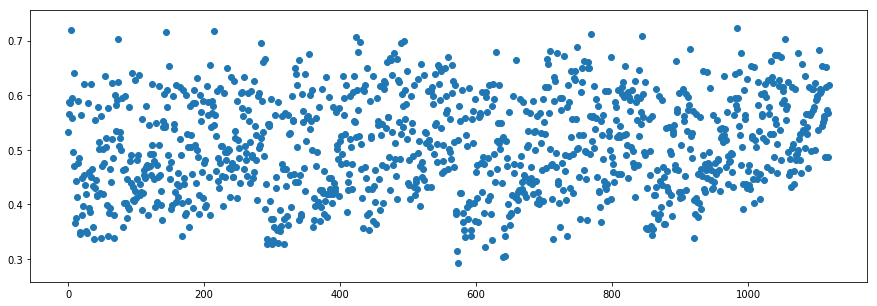

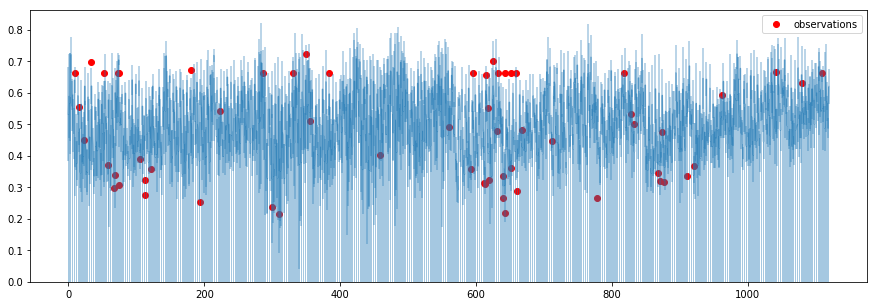

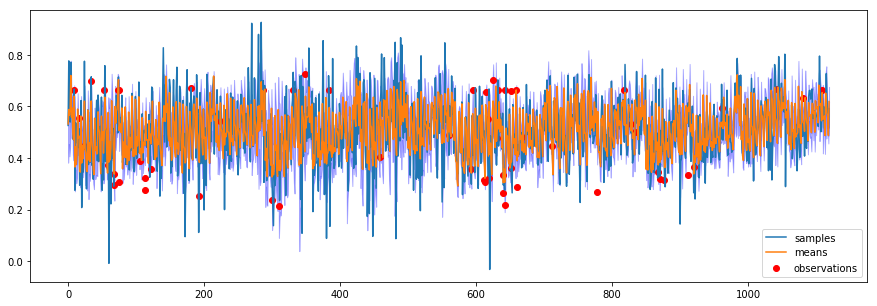

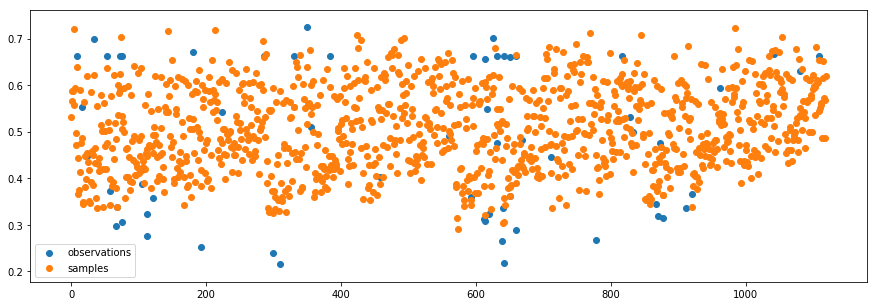

In [15]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 23)
new X is in there: True
new y is in there: True
mean probability is 0.36507936507936506
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 26)
new X is in there: True
new y is in there: True
mean probability is 0.40625
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 27)
new X is in there: True
new y is in there: True
mean probability is 0.4153846153846154
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 27)
new X is in there: True
new y is in there: True
mean probability is 0.4090909090909091
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 26)
new X is in there: True
new y is in there: True
mean probability is 0.3880597014925373
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 24)
new X is in there: True
new y

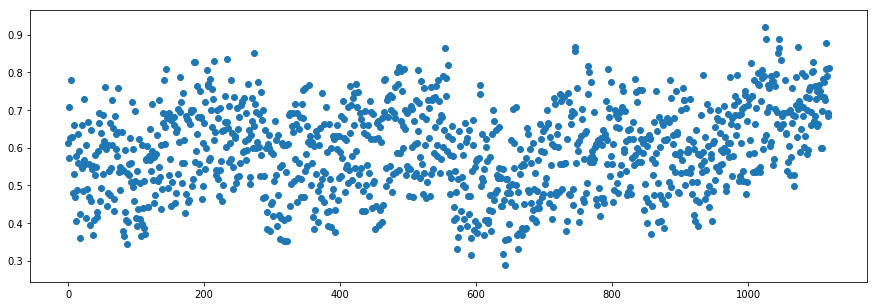

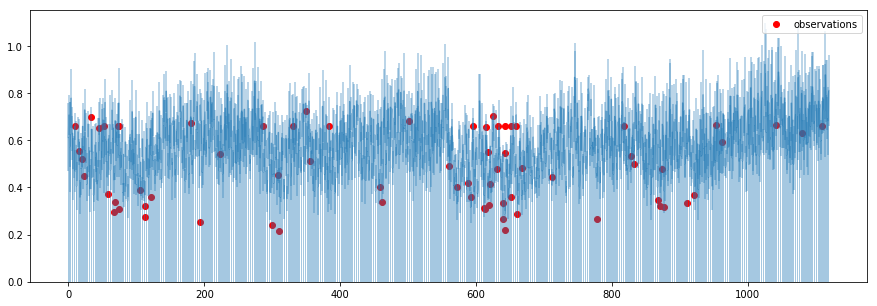

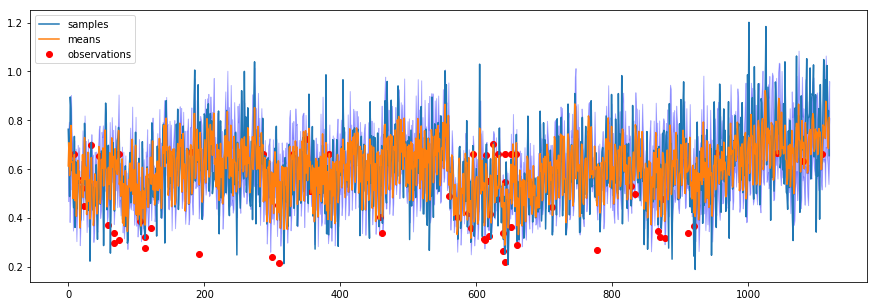

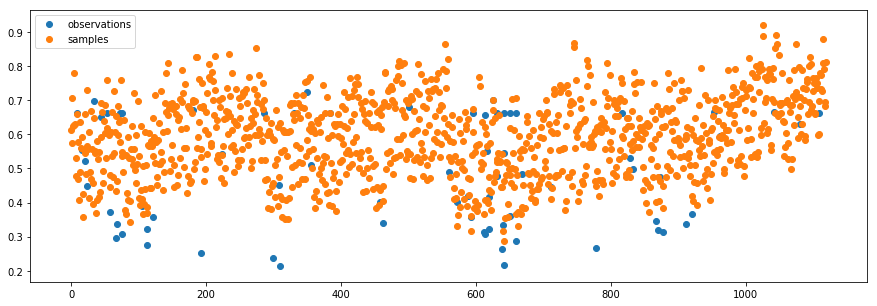

In [16]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 31)
new X is in there: True
new y is in there: True
mean probability is 0.4246575342465753
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 30)
new X is in there: True
new y is in there: True
mean probability is 0.40540540540540543
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 34)
new X is in there: True
new y is in there: True
mean probability is 0.4533333333333333
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 28)
new X is in there: True
new y is in there: True
mean probability is 0.3684210526315789
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 29)
new X is in there: True
new y is in there: True
mean probability is 0.37662337662337664
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 27)
new X is in there

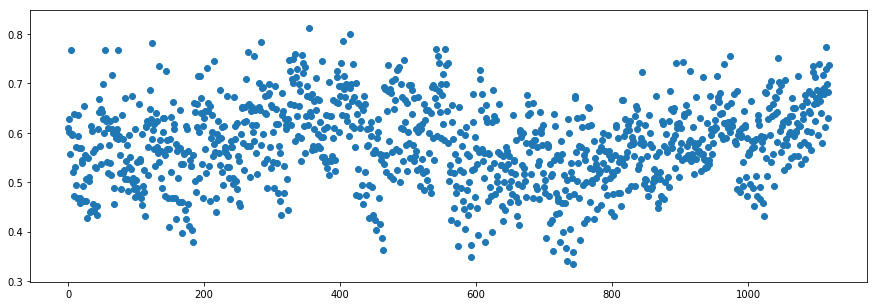

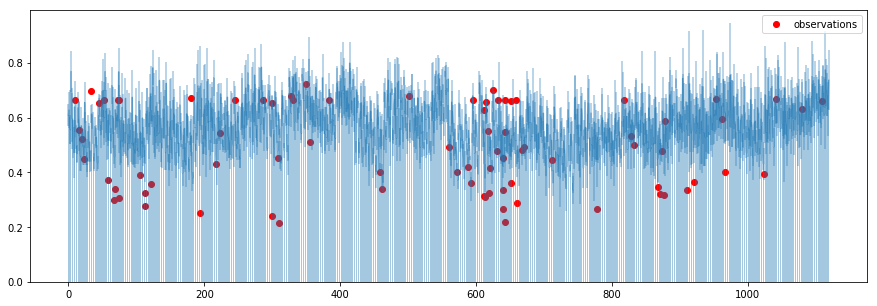

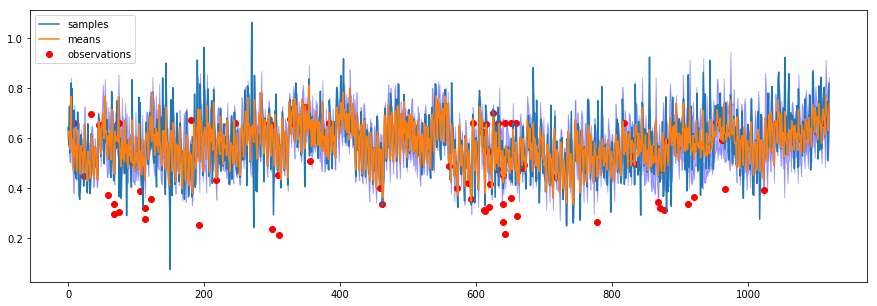

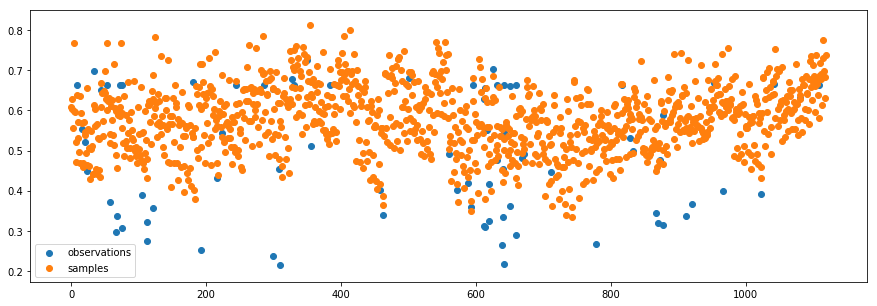

In [17]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 33)
new X is in there: True
new y is in there: True
mean probability is 0.39759036144578314
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 34)
new X is in there: True
new y is in there: True
mean probability is 0.40476190476190477
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 33)
new X is in there: True
new y is in there: True
mean probability is 0.38823529411764707
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 30)
new X is in there: True
new y is in there: True
mean probability is 0.3488372093023256
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 37)
new X is in there: True
new y is in there: True
mean probability is 0.42528735632183906
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 34)
new X is in the

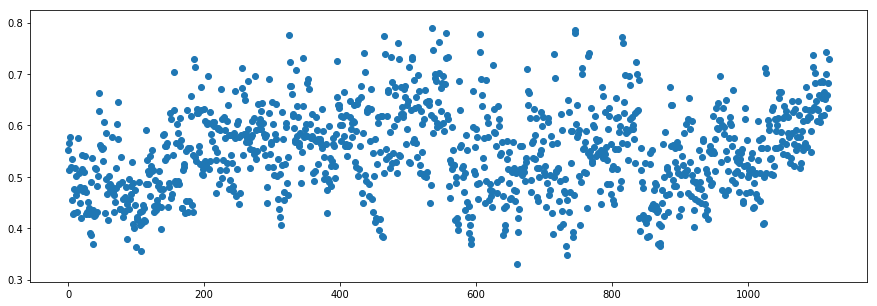

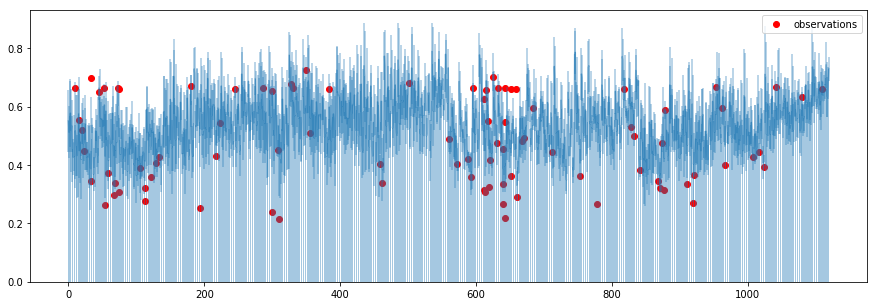

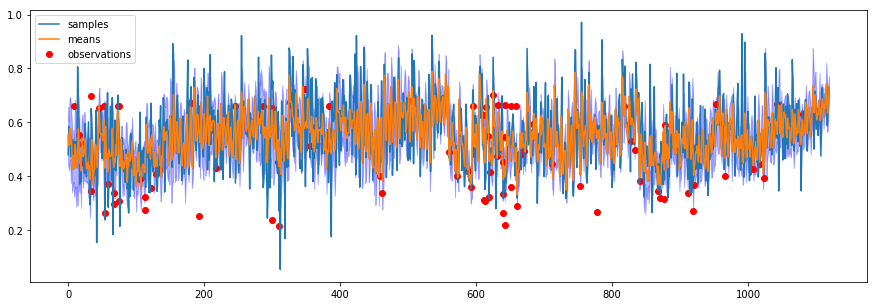

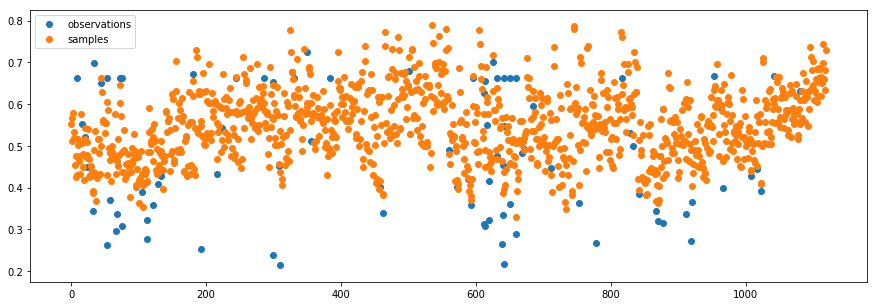

In [18]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 33)
new X is in there: True
new y is in there: True
mean probability is 0.3548387096774194
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 40)
new X is in there: True
new y is in there: True
mean probability is 0.425531914893617
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 36)
new X is in there: True
new y is in there: True
mean probability is 0.37894736842105264
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 38)
new X is in there: True
new y is in there: True
mean probability is 0.3958333333333333
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 30)
new X is in there: True
new y is in there: True
mean probability is 0.30927835051546393
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 35)
new X is in there:

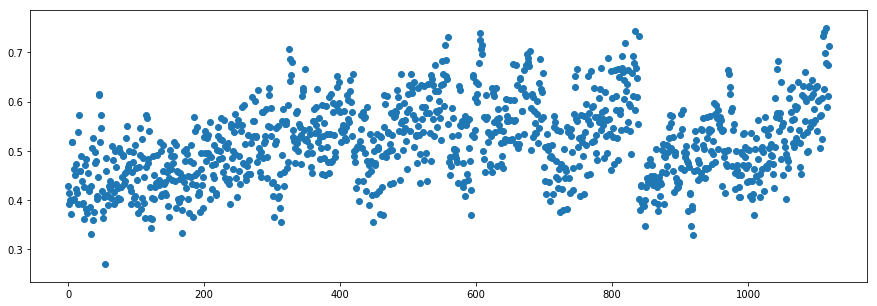

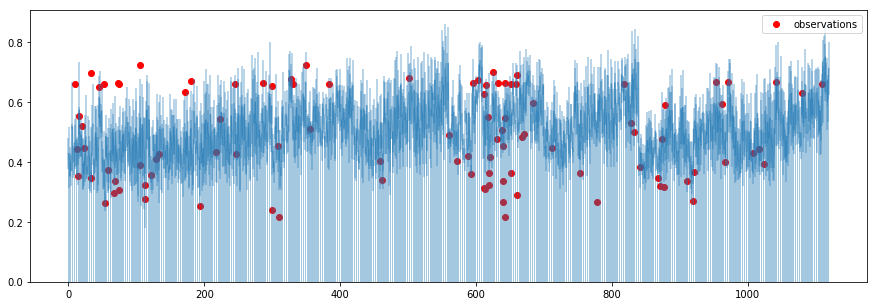

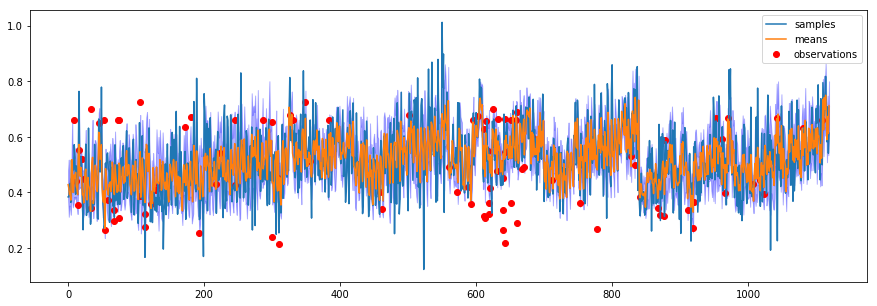

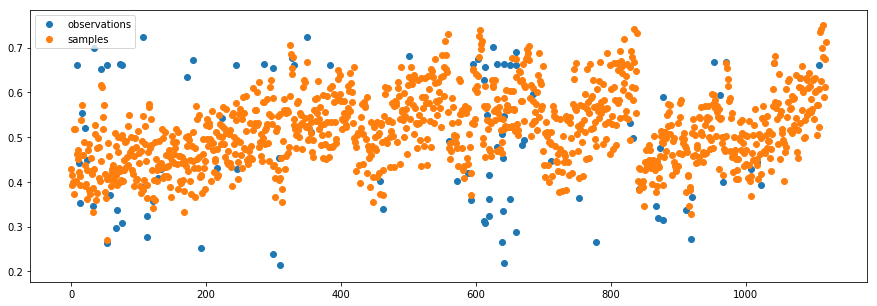

In [19]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 38)
new X is in there: True
new y is in there: True
mean probability is 0.36893203883495146
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 45)
new X is in there: True
new y is in there: True
mean probability is 0.4326923076923077
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 39)
new X is in there: True
new y is in there: True
mean probability is 0.37142857142857144
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 43)
new X is in there: True
new y is in there: True
mean probability is 0.4056603773584906
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 36)
new X is in there: True
new y is in there: True
mean probability is 0.3364485981308411
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 38)
new X is in there

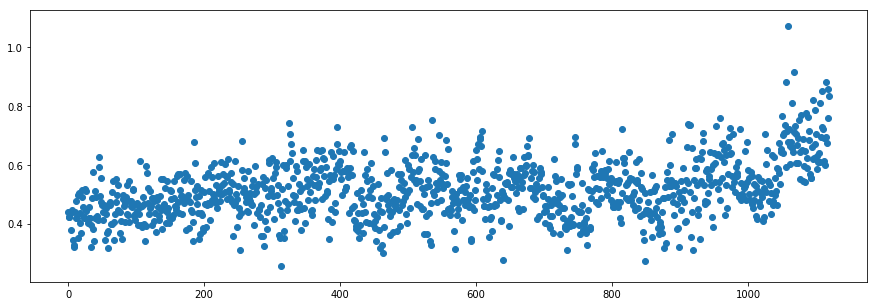

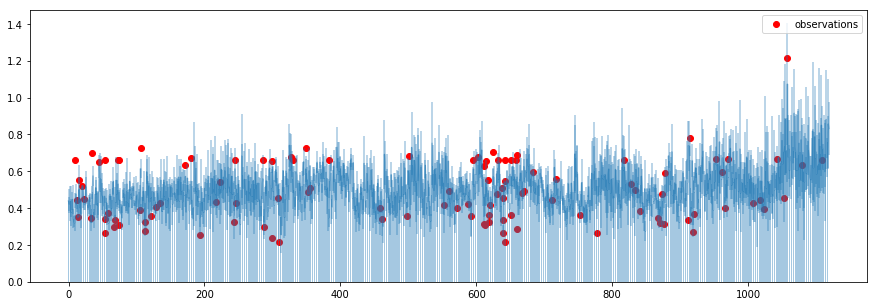

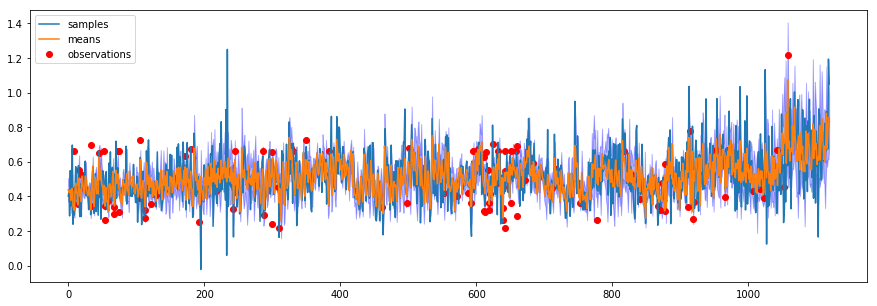

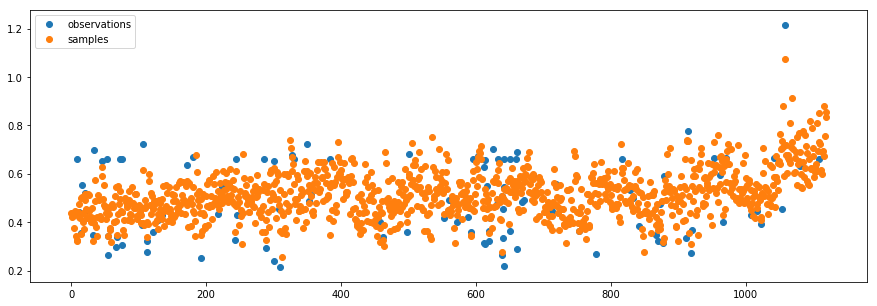

In [20]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 40)
new X is in there: True
new y is in there: True
mean probability is 0.35398230088495575
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 43)
new X is in there: True
new y is in there: True
mean probability is 0.37719298245614036
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 50)
new X is in there: True
new y is in there: True
mean probability is 0.43478260869565216
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 44)
new X is in there: True
new y is in there: True
mean probability is 0.3793103448275862
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 38)
new X is in there: True
new y is in there: True
mean probability is 0.3247863247863248
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 37)
new X is in ther

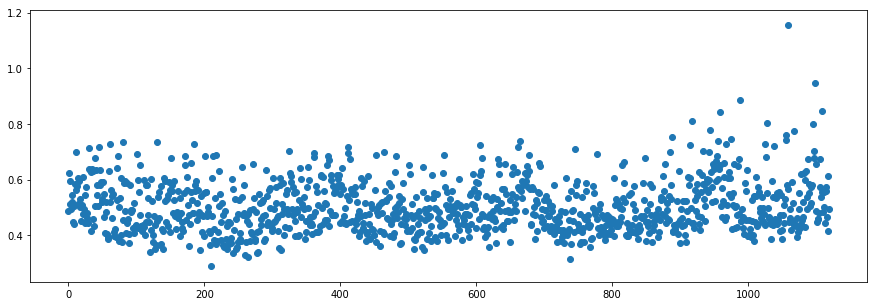

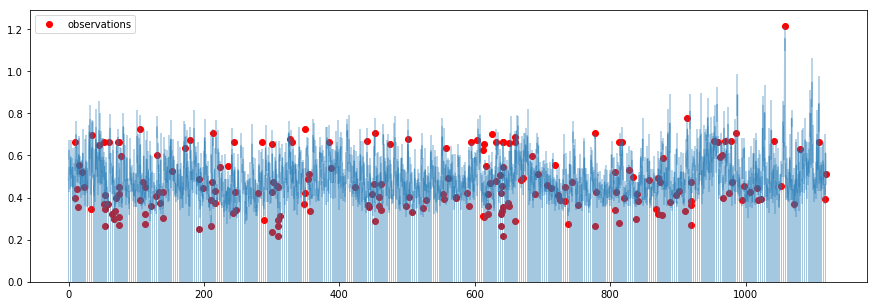

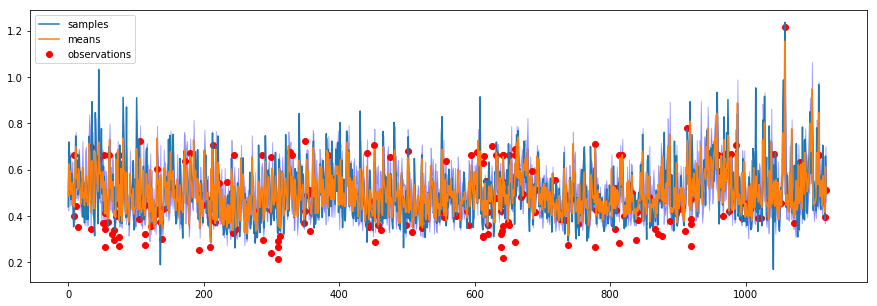

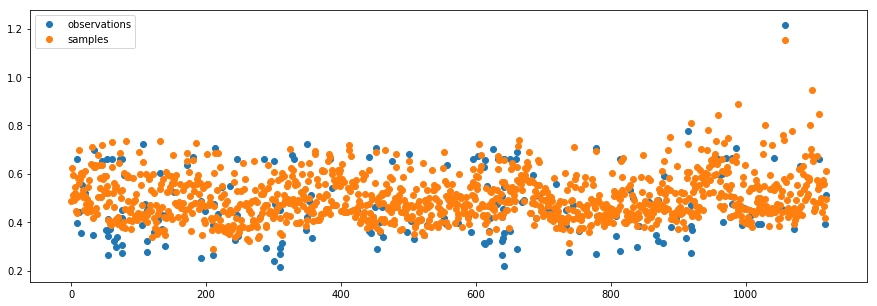

In [21]:
tg.goforit(100)
tg.plot_sample_grid()

In [22]:
tg.get_best_observation()

({'params': {'activations': [<function tensorflow.python.ops.gen_nn_ops.relu(features, name=None)>,
    <function tensorflow.python.ops.gen_nn_ops.relu(features, name=None)>,
    <function tensorflow.python.ops.gen_nn_ops.relu(features, name=None)>],
   'initialisation_scheme': <function tensorflow.contrib.layers.python.layers.initializers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32)>,
   'l2': False,
   'num_neurons': [50, 30, 20],
   'optimizer': tensorflow.python.training.adam.AdamOptimizer,
   'seed': 50},
  'score': 0.21540901137852267,
  'X': array([[1],
         [0],
         [0],
         [0],
         [1],
         [0],
         [0],
         [1],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1],
         [0],
         [1],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]], dtype=uint8)},
 {'params': {'activations': [<function tensorflow.python.ops.nn_ops.leaky_relu(features, alpha=0.2, name=N

initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 66)
new X is in there: True
new y is in there: True
mean probability is 0.30985915492957744
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 68)
new X is in there: True
new y is in there: True
mean probability is 0.3177570093457944
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 72)
new X is in there: True
new y is in there: True
mean probability is 0.33488372093023255
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 65)
new X is in there: True
new y is in there: True
mean probability is 0.30092592592592593
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 62)
new X is in there: True
new y is in there: True
mean probability is 0.2857142857142857
initialising Network <class 'networks.DropoutNetwork'>
length of the new dataset: (22, 68)
new X is in ther

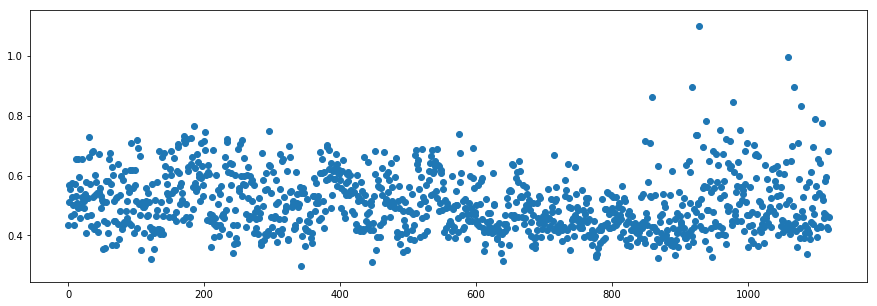

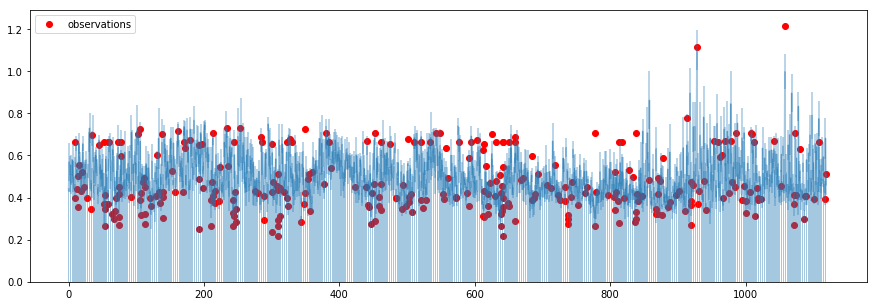

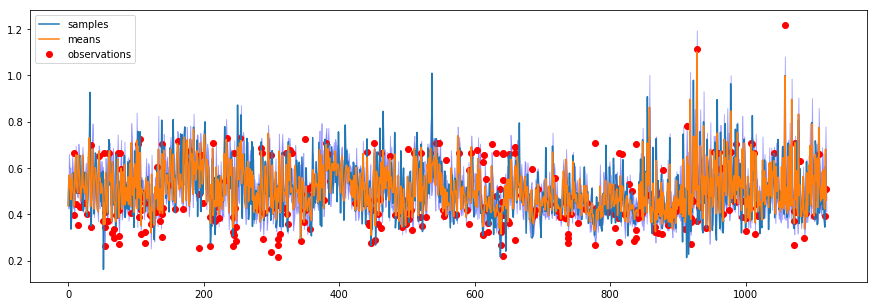

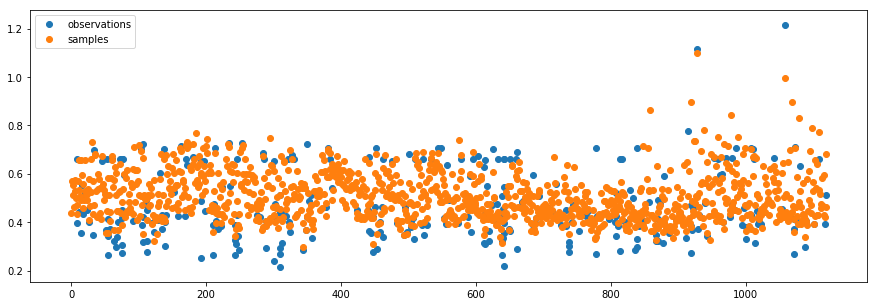

In [23]:
tg.goforit(100)
tg.plot_sample_grid()

In [24]:
observed = tg.observed

In [25]:
scores_observed = [x['score'] for x in observed]

In [26]:
import matplotlib.pyplot as plt

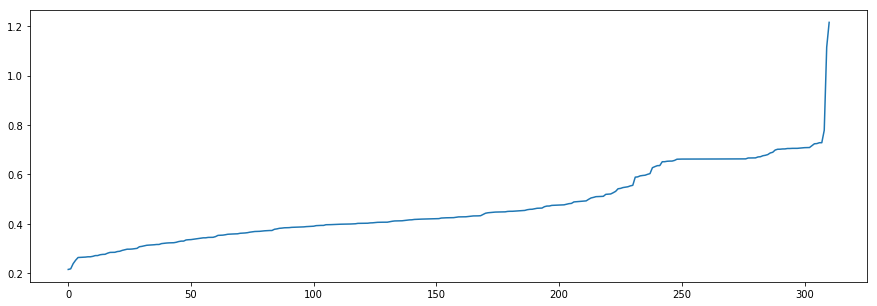

In [27]:
plt.plot(sorted(scores_observed))

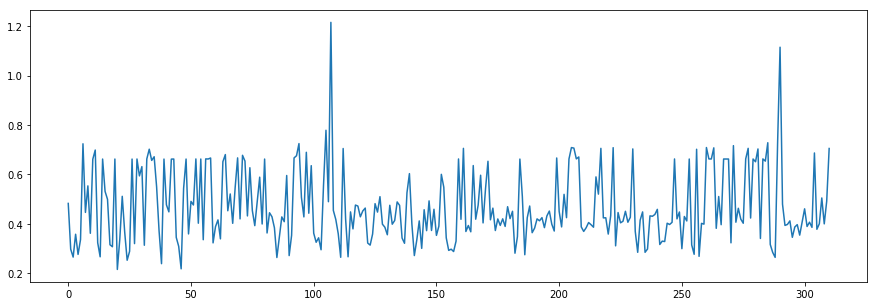

In [28]:
plt.plot(scores_observed)

In [29]:
sorted(scores_observed)[0]

0.21540901137852267

In [30]:
sorted(scores_observed)[-1]

1.2153273811289207

In [31]:
models_observed = [str(x['params']) for x in observed]
len(set(models_observed))

132

In [32]:
tg.get_best_observation()[:5]

({'params': {'activations': [<function tensorflow.python.ops.gen_nn_ops.relu(features, name=None)>,
    <function tensorflow.python.ops.gen_nn_ops.relu(features, name=None)>,
    <function tensorflow.python.ops.gen_nn_ops.relu(features, name=None)>],
   'initialisation_scheme': <function tensorflow.contrib.layers.python.layers.initializers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32)>,
   'l2': False,
   'num_neurons': [50, 30, 20],
   'optimizer': tensorflow.python.training.adam.AdamOptimizer,
   'seed': 50},
  'score': 0.21540901137852267,
  'X': array([[1],
         [0],
         [0],
         [0],
         [1],
         [0],
         [0],
         [1],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1],
         [0],
         [1],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]], dtype=uint8)},
 {'params': {'activations': [<function tensorflow.python.ops.nn_ops.leaky_relu(features, alpha=0.2, name=N

In [33]:
tg.observed

[{'params': {'activations': [<function tensorflow.python.ops.gen_nn_ops.relu(features, name=None)>,
    <function tensorflow.python.ops.gen_nn_ops.relu(features, name=None)>,
    <function tensorflow.python.ops.gen_nn_ops.relu(features, name=None)>],
   'initialisation_scheme': <function tensorflow.python.keras.initializers.he_normal(seed=None)>,
   'l2': False,
   'num_neurons': [10, 10, 10],
   'optimizer': tensorflow.contrib.opt.python.training.nadam_optimizer.NadamOptimizer,
   'seed': 100},
  'score': 0.4826219718152962,
  'X': array([[0],
         [0],
         [1],
         [0],
         [1],
         [0],
         [1],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1],
         [0],
         [0],
         [1],
         [0],
         [0],
         [1],
         [0],
         [0]], dtype=uint8)},
 {'params': {'activations': [<function tensorflow.python.ops.gen_nn_ops.relu(features, name=None)>,
    <function tensorflow.python.ops.gen